In [2]:
from cosmiclib import Compressor, Optimizer
import plotly.express as px
import pandas as pd
import numpy as np

In [147]:
def make_row(Qtot, sol_dict):
    dict_data = {'Qtot': [Qtot]}
    dict_data.update({f'{c}: q': [sol_dict['compressors'][c]['q']] for c in comp_names})
    dict_data.update({f'{c}: w': [sol_dict['compressors'][c]['w']] for c in comp_names})
    return pd.DataFrame(dict_data)

compressor1 = Compressor('Compressor 1', qmin=0.5, qmax=1, wmin=0.5, wmax=1)
compressor2 = Compressor('Compressor 2', qmin=0.5, qmax=0.75, wmin=0.75, wmax=7/8)
compressors = [compressor1, compressor2]
Qmax = sum([c.qmax for c in compressors])
comp_names = [c.name for c in compressors]
my_optimizer = Optimizer(compressors=compressors)
my_optimizer.setup_problem()

df = None
Qmax_plot = Qmax * 1.1
for Qtot in np.arange(0,Qmax_plot,0.001):
    solution = my_optimizer.find_opt(Qtot)
    if df is None:
        df = make_row(Qtot, solution)
    else:
        df = pd.concat([df, make_row(Qtot, solution)])
#df.set_index('Qtot')


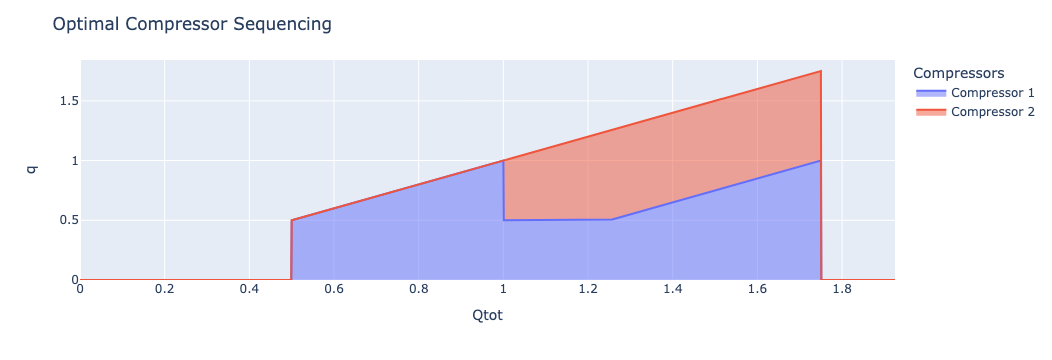

In [170]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd

df_Q = df[['Qtot', *[f'{c}: q' for c in comp_names]]].copy()
df_Q.rename(columns={f'{c}: q': c for c in comp_names}, inplace=True)
df_W = df[['Qtot', *[f'{c}: w' for c in comp_names]]].copy()
df_W.rename(columns={f'{c}: w': c for c in comp_names}, inplace=True)

#dg.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
# Melt the DataFrame to create a long-form dataset
df_Q_melted = df_Q.melt(id_vars=['Qtot'], var_name='Compressors', value_name='q')
df_W_melted = df_W.melt(id_vars=['Qtot'], var_name='Compressors', value_name='w')
df_melted = pd.merge(df_Q_melted, df_W_melted, on=['Qtot', 'Compressors'])

# Create a stacked area chart
fig = make_subplots(rows=2, cols=1)
fig = px.area(df_melted, x='Qtot', y='q', color='Compressors', line_group='Compressors', hover_name='Compressors', hover_data={'q': True, 'w': True})

# Customize the chart layout
fig.update_layout(title='Optimal Compressor Sequencing', xaxis_title='Qtot', yaxis_title='q')

# Display the chart
fig.show()

In [171]:
df_melted

,Qtot,Compressors,q,w
0,0.000,Compressor 1,0.0,0.0
1,0.001,Compressor 1,NaN,NaN
2,0.002,Compressor 1,NaN,NaN
3,0.003,Compressor 1,NaN,NaN
4,0.004,Compressor 1,NaN,NaN
...,...,...,...,...
3847,1.921,Compressor 2,NaN,NaN
3848,1.922,Compressor 2,NaN,NaN
3849,1.923,Compressor 2,NaN,NaN
3850,1.924,Compressor 2,NaN,NaN


In [165]:
df_new

,Qtot,Compressors,q,w
0,0.000,Compressor 1,0.0,0.0
1,0.001,Compressor 1,NaN,NaN
2,0.002,Compressor 1,NaN,NaN
3,0.003,Compressor 1,NaN,NaN
4,0.004,Compressor 1,NaN,NaN
...,...,...,...,...
3847,1.921,Compressor 2,NaN,NaN
3848,1.922,Compressor 2,NaN,NaN
3849,1.923,Compressor 2,NaN,NaN
3850,1.924,Compressor 2,NaN,NaN


In [98]:
df_melted

,Year,Category,Value
0,2015,A,3
1,2016,A,6
2,2017,A,8
3,2018,A,9
4,2019,A,11
5,2020,A,12
6,2015,B,5
7,2016,B,7
8,2017,B,6
9,2018,B,10


In [104]:
import pandas as pd

# Generate some sample data
df = pd.DataFrame({'Year': [2015, 2016, 2017, 2018, 2019, 2020],
                   'A': [3, 6, 8, 9, 11, 12],
                   'B': [5, 7, 6, 10, 12, 13],
                   'C': [4, 6, 7, 8, 9, 11]})

# Melt the DataFrame and retain 'Year' and 'A' and 'B' as values per observation
df_melted = df.melt(id_vars=['Year'], value_vars=['A', 'B'], var_name='Variable', value_name='Value')

# Print the melted DataFrame
print(df_melted)

    Year Variable  Value
0   2015        A      3
1   2016        A      6
2   2017        A      8
3   2018        A      9
4   2019        A     11
5   2020        A     12
6   2015        B      5
7   2016        B      7
8   2017        B      6
9   2018        B     10
10  2019        B     12
11  2020        B     13


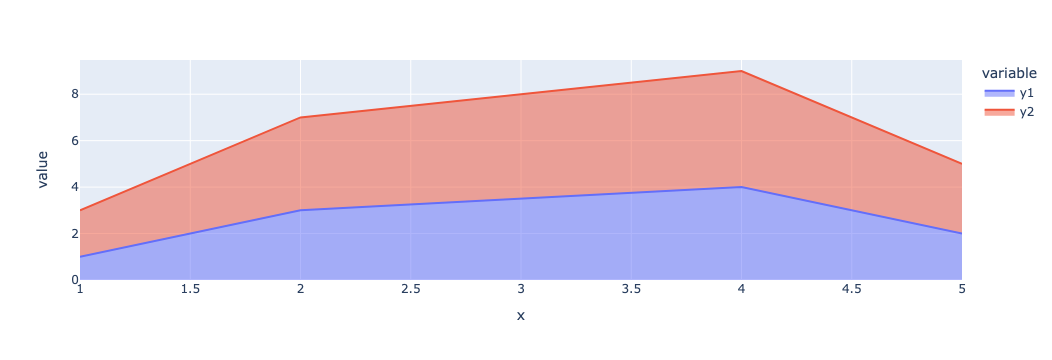